<a href="https://colab.research.google.com/github/dmassoo/MLT_labs/blob/main/Dmitrii_Vorotnikov_J41321c__MLT_2022_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [11]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

In [12]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    np.random.seed(42)
    w = np.random.randn(dim).T
    b = 0.
    
    return w, b

In [67]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    n = X.shape[0]
    I = np.ones(n)
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(X, w) + b)                          # compute activation
    cost = -(1./n)*np.sum(Y*np.log(A)+(I-Y)*np.log(I-A))   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./n)*np.dot(X.T, A-Y)
    db = (1./n)*np.sum(A-Y)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

### Propagation with SGD

In [74]:
def propagate_sgd(w, b, X, Y):
    from sklearn.utils import shuffle
    batch_size = 32
    X, Y = shuffle(X, Y, random_state=0)
    B = X[0:batch_size]
    Yb = Y[0:batch_size]
    
    A = sigmoid(np.dot(B, w) + b) # bm * m1 -> b1
    I = np.ones(batch_size)
    cost = -(1./batch_size)*np.sum(Yb*np.log(A)+(I-Yb)*np.log(I-A))

    dw = (1./batch_size)*np.dot(B.T, A-Yb)
    db = (1./batch_size)*np.sum(A-Yb)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [76]:
# added _propagate parameter - function 
def optimize(w, b, X, Y, num_iterations, learning_rate, _propagate = propagate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    # for plots later
    it_nums = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = _propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            it_nums.append(i)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs, it_nums

In [16]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    n = X.shape[0]
    Y_prediction = np.zeros(n)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(X, w)+b)
    
    for i in range(A.shape[0]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[i]<=0.5):
            Y_prediction[i]=0
        else:
            Y_prediction[i]=1
    
    return Y_prediction

In [85]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False, _propagate = propagate):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[1])

    # Gradient descent
    parameters, grads, costs, it_nums = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, _propagate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train.T)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test.T)) * 100))

    d = {"costs": costs,
         "iteration numbers": it_nums,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [18]:
# d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

In [19]:
# params, grads, costs = optimize(w, b, X, Y, num_iterations= 1500, learning_rate = 0.005, print_cost = True)

# print ("w = " + str(params["w"]))
# print ("b = " + str(params["b"]))
# print ("dw = " + str(grads["dw"]))
# print ("db = " + str(grads["db"]))

## Actual task

In [20]:
# load data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [21]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/MLT/bioresponse.csv")
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.000000,0.00,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.000000,0.00,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.000000,0.00,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.000000,0.00,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,0.000000,0.0000,0.000000,0.071800,0.362006,0.229374,0.603893,0.129706,0.092400,0.036100,0.00473,0.069000,1,0.00,0.486439,0.783710,1,1,0.000000,0.364694,0.136861,0.047300,0.100295,0.00000,0.000000,0.000000,0.00,0.223324,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,0.085200,0.2500,0.064500,0.121309,0.347521,0.250846,0.660747,0.221975,0.167944,0.065700,0.00939,0.172414,1,0.00,0.390864,0.815279,0,1,0.000000,0.153533,0.127563,0.122141,0.104815,0.08000,0.191429,0.146735,0.00,0.101137,0.075100,...,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,0.624027,0.1875,0.064500,0.091700,0.519094,0.243037,0.691896,0.215831,0.338637,0.290643,0.04450,0.103448,1,0.00,0.590995,0.581372,0,0,0.333333,0.128839,0.357203,0.077600,0.028500,0.06200,0.308468,0.166667,0.00,0.019900,0.377263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.37293

In [22]:
# Data preparation
y = df['Activity']
X = df.drop('Activity', axis = 1)
w, b = initialize_with_zeros(X.shape[1])
w.shape

(1776,)

In [68]:
# testing propagation
# propagate(w, b, X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


({'db': 0.25636969851245683,
  'dw': array([0.02437511, 0.14615932, 0.01611434, ..., 0.00475172, 0.00578321,
         0.00368508])},
 inf)

In [75]:
# testing propagation
# propagate_sgd(w, b, X, y)

({'db': 0.04697983013023882,
  'dw': array([0.01773978, 0.02261133, 0.00732899, ..., 0.        , 0.06249584,
         0.03125   ])},
 2.5449686247835843)

In [70]:
# test GD optimizerr
# params, grads, costs, it_nums = optimize(w, b, X, y, num_iterations= 200, learning_rate = 0.05, print_cost = True)

# print ("w = " + str(params["w"]))
# print ("b = " + str(params["b"]))
# print ("dw = " + str(grads["dw"]))
# print ("db = " + str(grads["db"]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


Cost after iteration 0: inf
Cost after iteration 100: inf
w = [ 0.44886403 -0.10505727  0.62548434 ...  0.14250429 -0.78783218
 -1.33379159]
b = -0.00504163260065963
dw = [ 0.00082929 -0.0029577   0.00073498 ...  0.00124514  0.00079508
 -0.00106625]
db = 0.00019832500558808017


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# splitting dataset on train and test
train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(X, y, test_size = 0.25, random_state = 42)

Learning GD models

In [28]:
d_005 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.005, print_cost = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


train accuracy: 54.10593672236047 %
test accuracy: 53.73134328358209 %


In [29]:
d_01 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.01, print_cost = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


train accuracy: 56.80767863490935 %
test accuracy: 56.39658848614072 %


In [30]:
d_05 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.05, print_cost = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


train accuracy: 68.82332029861358 %
test accuracy: 64.28571428571428 %


In [33]:
d_1 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.1, print_cost = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


train accuracy: 73.65801635264842 %
test accuracy: 67.3773987206823 %


In [34]:
d_2 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.2, print_cost = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


train accuracy: 76.85744756487736 %
test accuracy: 70.8955223880597 %


In [84]:
d_5 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.5, print_cost = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


train accuracy: 77.31958762886597 %
test accuracy: 71.96162046908316 %


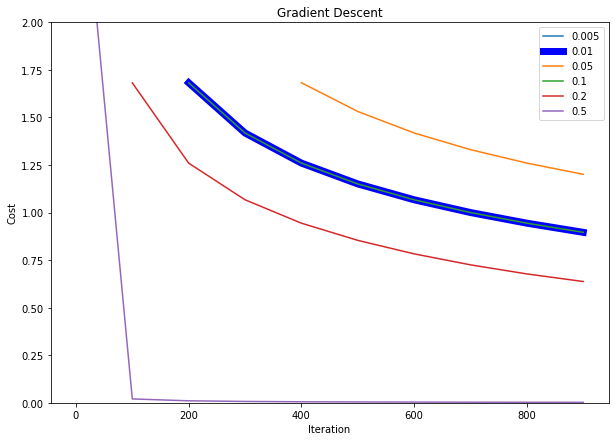

In [96]:
plt.figure(figsize=(10,7))
plt.title("Gradient Descent")
plt.plot(d_005["iteration numbers"], d_005["costs"], label = "0.005")
plt.plot(d_01["iteration numbers"], d_01["costs"], label = "0.01", color='b', linewidth=7)
plt.plot(d_05["iteration numbers"], d_05["costs"], label = "0.05")
plt.plot(d_1["iteration numbers"], d_1["costs"], label = "0.1")
plt.plot(d_2["iteration numbers"], d_2["costs"], label = "0.2")
plt.plot(d_5["iteration numbers"], d_5["costs"], label = "0.5")
plt.ylim(0, 2)
plt.ylabel("Cost")
plt.xlabel("Iteration")
plt.legend()

Learning SGD models

In [87]:
sd_005 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.005, print_cost = False, _propagate = propagate_sgd)

train accuracy: 54.10593672236047 %
test accuracy: 54.15778251599147 %


In [88]:
sd_01 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.01, print_cost = False, _propagate = propagate_sgd)

train accuracy: 54.92356914326342 %
test accuracy: 56.18336886993603 %


In [89]:
sd_05 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.05, print_cost = False, _propagate = propagate_sgd)

train accuracy: 56.77212939921792 %
test accuracy: 58.63539445628998 %


In [90]:
sd_1 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.1, print_cost = False, _propagate = propagate_sgd)

train accuracy: 57.41201564166371 %
test accuracy: 59.3816631130064 %


In [91]:
sd_2 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.2, print_cost = False, _propagate = propagate_sgd)

train accuracy: 57.58976182012086 %
test accuracy: 58.95522388059701 %


In [92]:
sd_5 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.5, print_cost = False, _propagate = propagate_sgd)

train accuracy: 57.90970494134376 %
test accuracy: 60.02132196162047 %


In [171]:
sd_5_5000 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 5000, learning_rate = 0.5, print_cost = True, _propagate = propagate_sgd)

Cost after iteration 0: 3.177832
Cost after iteration 100: 0.020321
Cost after iteration 200: 0.010437
Cost after iteration 300: 0.007087
Cost after iteration 400: 0.005383
Cost after iteration 500: 0.004347
Cost after iteration 600: 0.003649
Cost after iteration 700: 0.003146
Cost after iteration 800: 0.002766
Cost after iteration 900: 0.002469
Cost after iteration 1000: 0.002230
Cost after iteration 1100: 0.002034
Cost after iteration 1200: 0.001869
Cost after iteration 1300: 0.001730
Cost after iteration 1400: 0.001609
Cost after iteration 1500: 0.001505
Cost after iteration 1600: 0.001414
Cost after iteration 1700: 0.001333
Cost after iteration 1800: 0.001260
Cost after iteration 1900: 0.001196
Cost after iteration 2000: 0.001137
Cost after iteration 2100: 0.001085
Cost after iteration 2200: 0.001036
Cost after iteration 2300: 0.000992
Cost after iteration 2400: 0.000952
Cost after iteration 2500: 0.000915
Cost after iteration 2600: 0.000881
Cost after iteration 2700: 0.000849
Cost

For sgd iteration is faster, but less precise -> more iterations required. This model is still uderfitted although there was 5 times more iterations than for regular GD

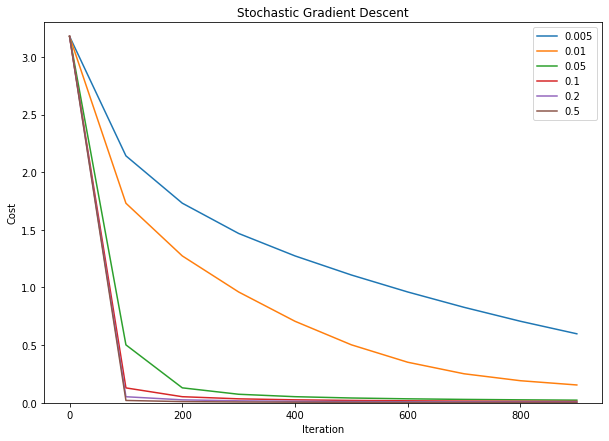

In [99]:
plt.figure(figsize=(10,7))
plt.title("Stochastic Gradient Descent")
plt.plot(sd_005["iteration numbers"], sd_005["costs"], label = "0.005")
plt.plot(sd_01["iteration numbers"], sd_01["costs"], label = "0.01")
plt.plot(sd_05["iteration numbers"], sd_05["costs"], label = "0.05")
plt.plot(sd_1["iteration numbers"], sd_1["costs"], label = "0.1")
plt.plot(sd_2["iteration numbers"], sd_2["costs"], label = "0.2")
plt.plot(sd_5["iteration numbers"], sd_5["costs"], label = "0.5")
plt.ylim(0, 3.3)
plt.ylabel("Cost")
plt.xlabel("Iteration")
plt.legend()

### With selected learning rate range cost decreases faster with LS ingrease 

# ADAM

In [185]:
# TODO debug ADAM - difference between models in optimizers only
# WHY w = [nan...nan]????
def optimize_adam(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    def step_vs(t, v_prev, vb_prev, s_prev, sb_prev, w_prev, b_prev):
        grads, cost = propagate(w_prev, b_prev, X, Y)
        dw = grads["dw"]
        db = grads["db"]

        b1 = 0.9
        b2 = 0.999
        e = 10e-8
        vt = b1 * v_prev + (1-b1) * dw
        st = b2 * s_prev + (1-b2) * dw**2
        vtb = b1 * vb_prev + (1-b1) * db
        stb = b2 * sb_prev + (1-b2) * db**2
        stcorr = st / (b2 ** t)
        stcorrb = stb / (b2 ** t)
        dwa = learning_rate * vt / (stcorr**0.5 + e)
        dba = learning_rate * vtb / (stcorrb**.5 + e)

        return vt, vtb, st, stb, dwa, dba, cost
    
    vt, vtb, st, stb, dwa, dba, cost = step_vs(0, 0, 0, 0, 0, w, b)
    costs = [cost]
    it_nums = [0]
    # print("0DWA = "+ str(dwa))
    w -= dwa
    b -= dba
    for i in range(1, num_iterations):
        vt, vtb, st, stb, dwa, dba, cost = step_vs(i, vt, vtb, st, stb, w, b)
        # print("DWA = "+ str(dwa))
        # update rule
        w -=dwa
        b -=dba


        if i % 100 == 0:
            costs.append(cost)
            it_nums.append(i)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dwa,
             "db": dba}
    
    return params, grads, costs, it_nums

In [176]:
def model_adam(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[1])

    # Gradient descent
    parameters, grads, costs, it_nums = optimize_adam(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train.T)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test.T)) * 100))

    d = {"costs": costs,
         "iteration numbers": it_nums,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
# testing adam optimizer
# optimize_adam(w, b, X, y, num_iterations=300, learning_rate=0.4, print_cost=True)

### MODEL learning and plots:

In [186]:
ad_005 = model_adam(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.005, print_cost = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


Cost after iteration 100: 0.699521
Cost after iteration 200: 0.466505
Cost after iteration 300: 0.382817
Cost after iteration 400: 0.339781
Cost after iteration 500: 0.312405
Cost after iteration 600: 0.293499
Cost after iteration 700: 0.279668
Cost after iteration 800: 0.268996
Cost after iteration 900: 0.260421
train accuracy: 89.975115535016 %
test accuracy: 73.13432835820896 %


In [187]:
ad_01 = model_adam(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.01, print_cost = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


train accuracy: 92.35691432634198 %
test accuracy: 72.60127931769722 %


In [188]:
ad_05 = model_adam(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.05, print_cost = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


train accuracy: 94.06327763953075 %
test accuracy: 71.42857142857143 %


In [189]:
ad_1 = model_adam(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.1, print_cost = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


train accuracy: 94.84536082474227 %
test accuracy: 70.57569296375267 %


In [190]:
ad_2 = model_adam(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.2, print_cost = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


train accuracy: 95.44969783149662 %
test accuracy: 70.1492537313433 %


In [191]:
ad_5 = model_adam(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.5, print_cost = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


Cost after iteration 100: inf
Cost after iteration 200: 0.287563
Cost after iteration 300: 0.157536
Cost after iteration 400: 0.136506
Cost after iteration 500: 0.120708
Cost after iteration 600: 0.113395
Cost after iteration 700: 0.108013
Cost after iteration 800: 0.103777
Cost after iteration 900: 0.100290
train accuracy: 96.55172413793103 %
test accuracy: 69.82942430703625 %


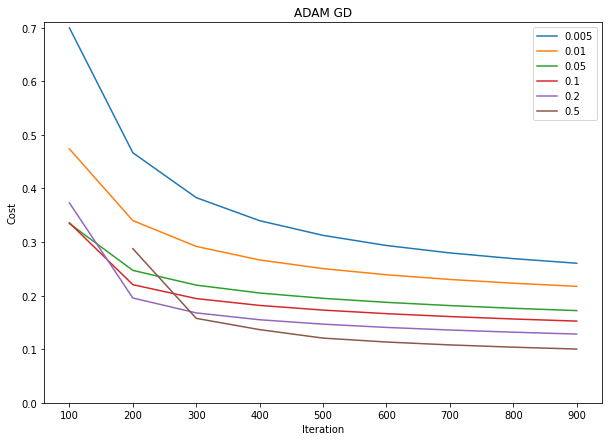

In [196]:
plt.figure(figsize=(10,7))
plt.title("ADAM GD")
plt.plot(ad_005["iteration numbers"], ad_005["costs"], label = "0.005")
plt.plot(ad_01["iteration numbers"], ad_01["costs"], label = "0.01")
plt.plot(ad_05["iteration numbers"], ad_05["costs"], label = "0.05")
plt.plot(ad_1["iteration numbers"], ad_1["costs"], label = "0.1")
plt.plot(ad_2["iteration numbers"], ad_2["costs"], label = "0.2")
plt.plot(ad_5["iteration numbers"], ad_5["costs"], label = "0.5")
plt.ylim(0, 0.71)
plt.ylabel("Cost")
plt.xlabel("Iteration")
plt.legend()

As we can see, model with ADAM optimizer is fitting faster, but it tends to overfit with chosen learning rate range. Accuracy for α = 0.005 is comparable with result for GD with α = 0.5

It is propably possible to improve result using less value of α, let's check:

In [200]:
ad_0001 = model_adam(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.001, print_cost = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


Cost after iteration 100: 1.776412
Cost after iteration 200: 1.340056
Cost after iteration 300: 1.108710
Cost after iteration 400: 0.956864
Cost after iteration 500: 0.849410
Cost after iteration 600: 0.768962
Cost after iteration 700: 0.707264
Cost after iteration 800: 0.658423
Cost after iteration 900: 0.618387
train accuracy: 77.53288304301458 %
test accuracy: 69.18976545842217 %


With fixed number of iterations equal to 1000 - NOT.

In [199]:
# learn with 10000 iterations
ad_0001 = model_adam(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 10000, learning_rate = 0.001, print_cost = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


Cost after iteration 100: 1.776412
Cost after iteration 200: 1.340056
Cost after iteration 300: 1.108710
Cost after iteration 400: 0.956864
Cost after iteration 500: 0.849410
Cost after iteration 600: 0.768962
Cost after iteration 700: 0.707264
Cost after iteration 800: 0.658423
Cost after iteration 900: 0.618387
Cost after iteration 1000: 0.584880
Cost after iteration 1100: 0.556476
Cost after iteration 1200: 0.532174
Cost after iteration 1300: 0.511207
Cost after iteration 1400: 0.492965
Cost after iteration 1500: 0.476962
Cost after iteration 1600: 0.462817
Cost after iteration 1700: 0.450229
Cost after iteration 1800: 0.438958
Cost after iteration 1900: 0.428809
Cost after iteration 2000: 0.419623
Cost after iteration 2100: 0.411273
Cost after iteration 2200: 0.403649
Cost after iteration 2300: 0.396665
Cost after iteration 2400: 0.390243
Cost after iteration 2500: 0.384320
Cost after iteration 2600: 0.378842
Cost after iteration 2700: 0.373761
Cost after iteration 2800: 0.369036
C

Overfitting is still observable, but test accuracy is better.